In [141]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_style('whitegrid')

**Check the head of customers, and check out its info() and describe() methods.**

In [142]:
df = pd.read_csv('Salary_Data.csv')
df.head(20)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [144]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Delivery Time and Sorting Time columns. Does the correlation make sense?**

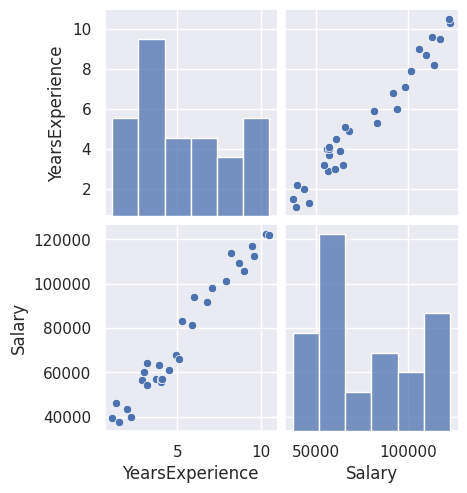

In [145]:
sns.pairplot(df)

In [146]:
df1=df.rename({'YearsExperience':'EXP', 'Salary':'SAL'},axis=1)

<ipython-input-147-638acf91b497>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['EXP'])


<Axes: xlabel='EXP', ylabel='Density'>

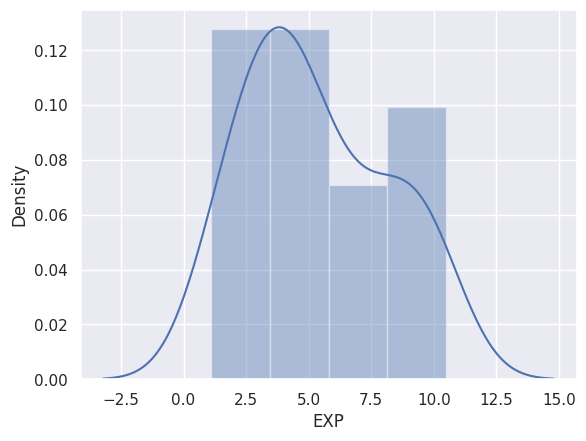

In [147]:
sns.distplot(df1['EXP'])

<ipython-input-148-61231ea3b71f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['SAL'])


<Axes: xlabel='SAL', ylabel='Density'>

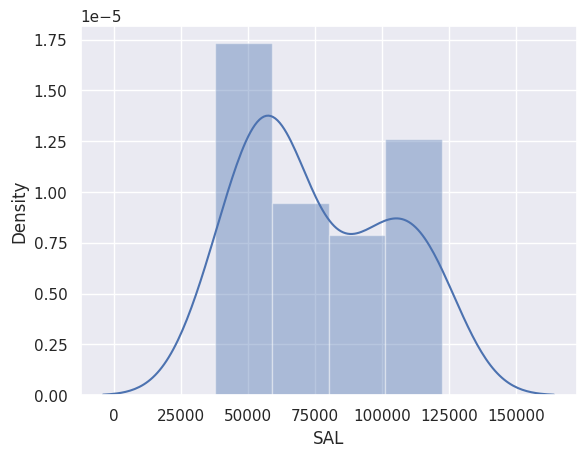

In [148]:
sns.distplot(df1['SAL'])

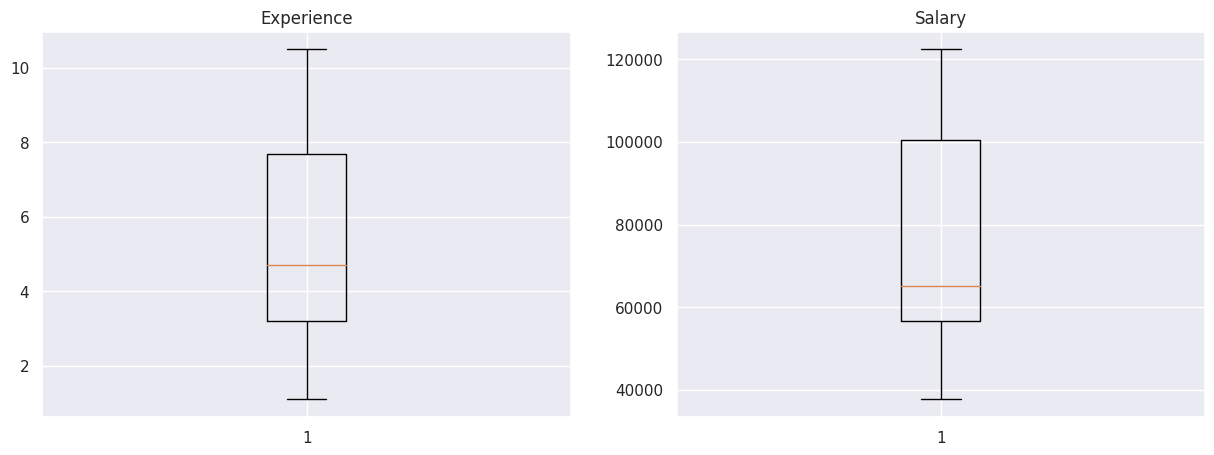

In [149]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(df1['EXP'])
plt.title("Experience")
plt.subplot(1,2,2)
plt.boxplot(df1['SAL'])
plt.title("Salary")
plt.show()


Text(0.5, 1.0, 'Boxplot')

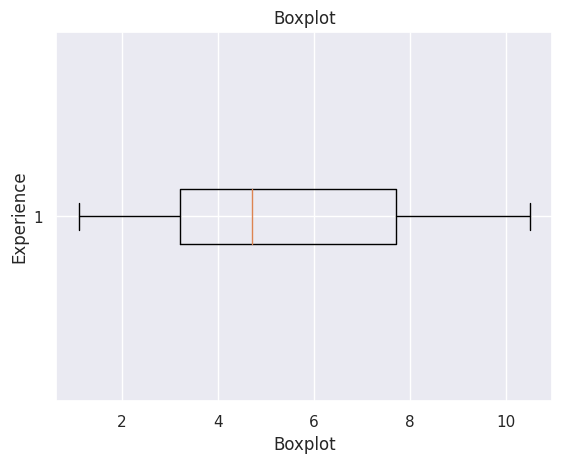

In [150]:
# vertical Boxplot
plt.boxplot(df1['EXP'],vert=False)
plt.ylabel("Experience")
plt.xlabel("Boxplot")
plt.title("Boxplot")

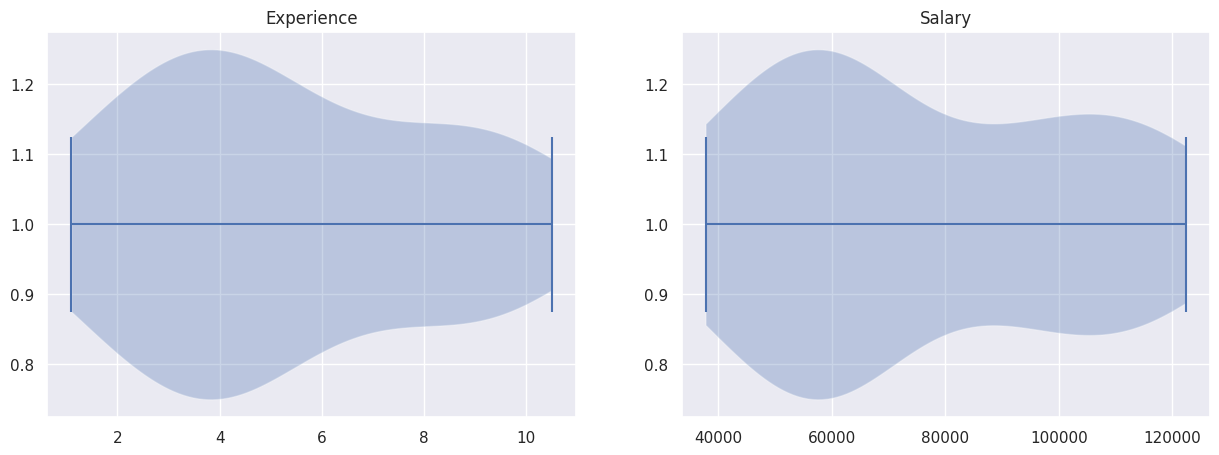

In [151]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.violinplot(df1['EXP'],vert=False)
plt.title("Experience")
plt.subplot(1,2,2)
plt.violinplot(df1['SAL'],vert=False)
plt.title("Salary")
plt.show()

In [152]:
df1.corr().style.background_gradient(cmap='coolwarm')

,EXP,SAL
EXP,1.000000,0.978242
SAL,0.978242,1.000000


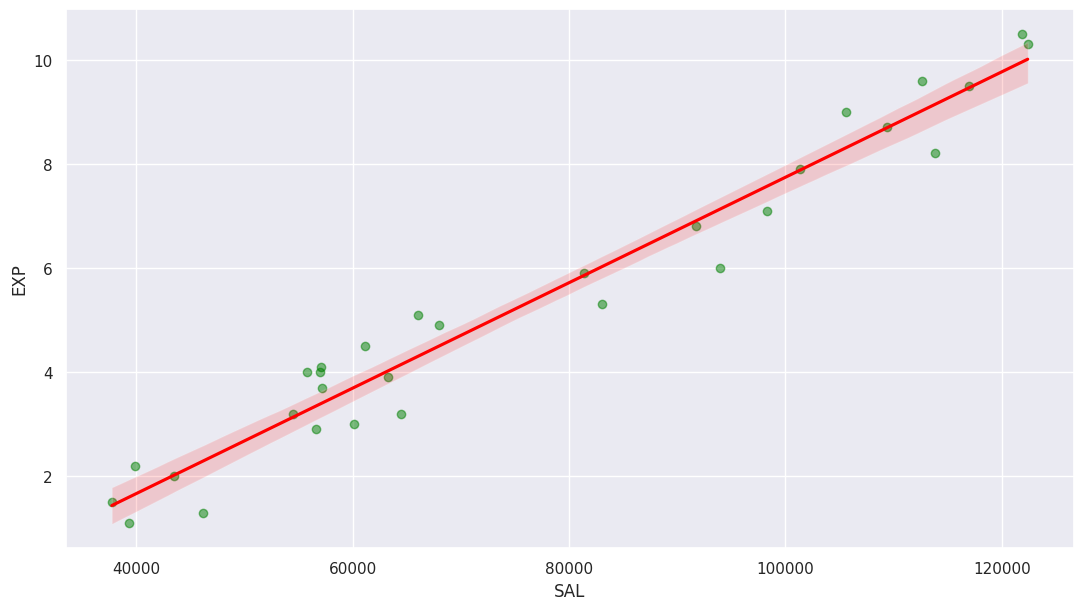

In [153]:
sns.set(style="darkgrid")
plt.figure(figsize=(13,7))
sns.regplot(x="SAL", y="EXP", data=df1, scatter_kws={"color": "green", 'alpha': 0.5}, line_kws={"color": "red"})
plt.show()

In [154]:
x = df1[['EXP']]
y = df1[['SAL']]


In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [156]:
lm.fit(X_train,y_train)

LinearRegression()

In [157]:
print(lm.intercept_)

[25570.53828249]


In [158]:
lm.coef_

array([[9692.26318876]])

In [159]:
lm.score(X_train,y_train)

0.9300257612268854

In [160]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
cdf.head()

,Coefficient
EXP,9692.263189


In [161]:
y_pred = lm.predict(X_test)
lm.score(X_test,y_test)

0.974811112371526

In [162]:
y_pred

array([[ 91477.92796603],
       [109893.22802466],
       [ 56585.7804865 ],
       [ 82754.89109615],
       [ 40108.93306562],
       [118616.26489454],
       [117647.03857567],
       [ 75001.08054514],
       [112800.90698129],
       [125400.84912667]])

In [163]:
y_test

,SAL
20,91738.0
24,109431.0
7,54445.0
18,81363.0
2,37731.0
27,112635.0
26,116969.0
16,66029.0
25,105582.0
28,122391.0


Text(0, 0.5, 'Predictions')

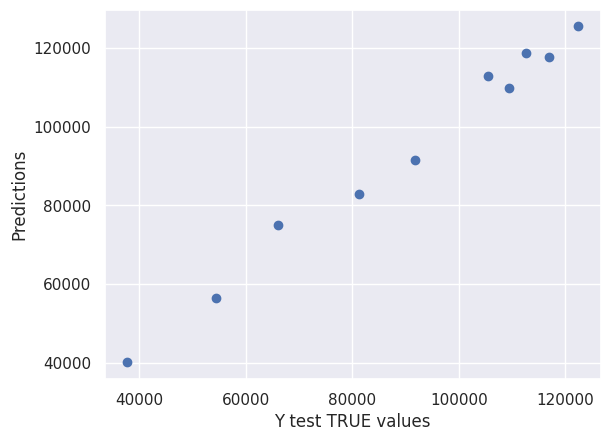

In [164]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y test TRUE values')
plt.ylabel('Predictions')

## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

<ipython-input-165-7ff73e85f24c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred),bins=10)


<Axes: ylabel='Density'>

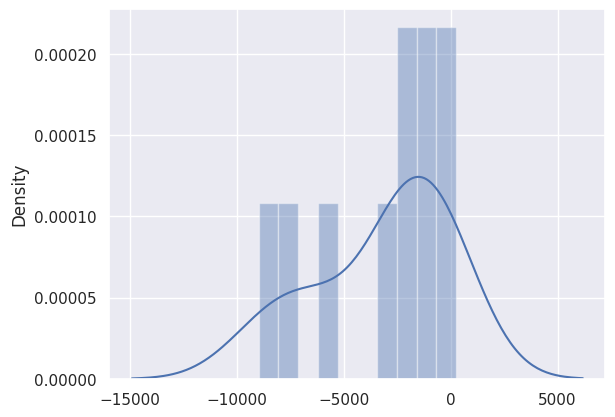

In [165]:
sns.distplot((y_test-y_pred),bins=10)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [166]:
from sklearn import metrics
# calculate these metrics by hand!

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3249.304483022086
MSE: 19036146.491626855
RMSE: 4363.043260343273


<ipython-input-167-5f5db9289f83>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['EXP'], bins = 6, kde = True, ax=axes[0])
<ipython-input-167-5f5db9289f83>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['EXP'], bins = 6, kde = True, ax=axes[0])
<ipython-input-167-5f5db9289f83>:6: User

Text(0.5, 1.0, 'NO Transformation')

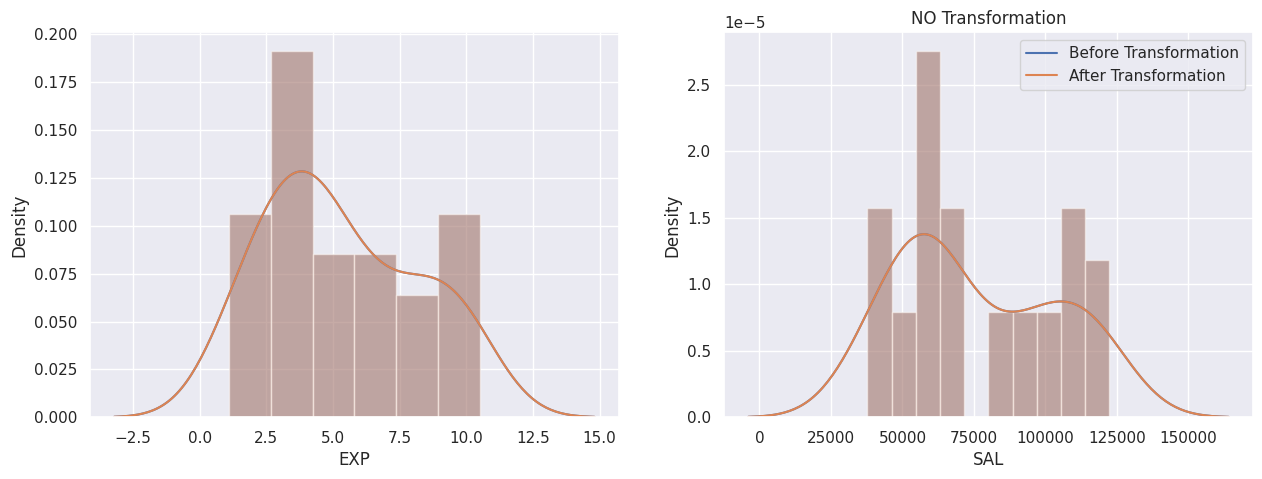

In [167]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.title("NO Transformation",loc='center')
sns.distplot(df1['EXP'], bins = 6, kde = True, ax=axes[0])
sns.distplot(df1['EXP'], bins = 6, kde = True, ax=axes[0])

sns.distplot(df1['SAL'], bins = 10, kde = True, ax=axes[1])
sns.distplot(df1['SAL'], bins = 10, kde = True, ax=axes[1])

labels = ['Before Transformation','After Transformation']
plt.legend(labels)
plt.title("NO Transformation",loc='center')

<ipython-input-168-54b999deb80a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['EXP'], bins = 6, kde = True, ax=axes[0])
<ipython-input-168-54b999deb80a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df1['EXP']), bins = 6, kde = True, ax=axes[0])
<ipython-input-168-54b999deb80a>

Text(0.5, 1.0, 'Log Transformation')

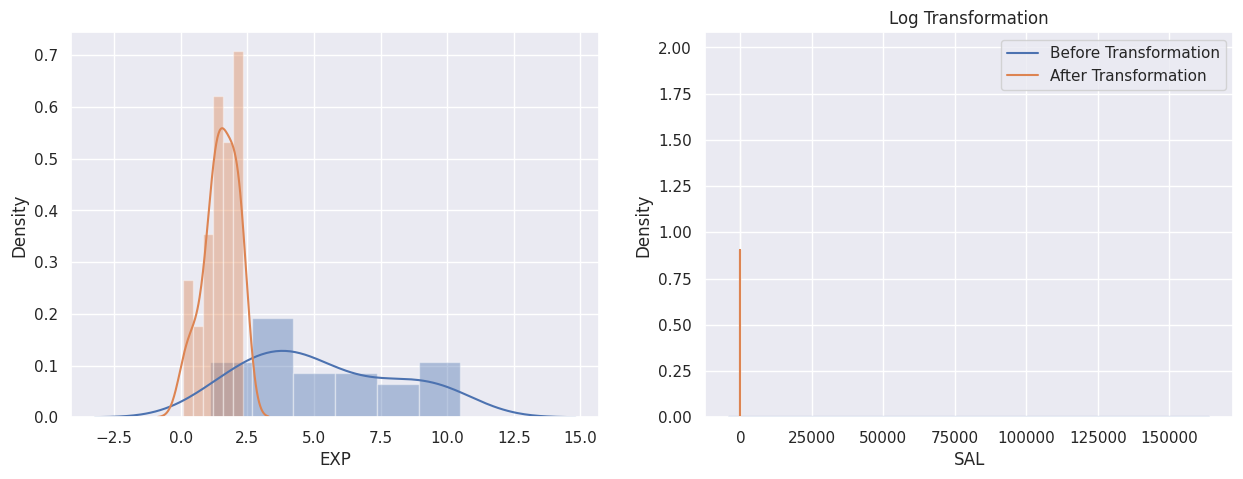

In [168]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(df1['EXP'], bins = 6, kde = True, ax=axes[0])
sns.distplot(np.log(df1['EXP']), bins = 6, kde = True, ax=axes[0])

sns.distplot(df1['SAL'], bins = 10, kde = True, ax=axes[1])
sns.distplot(np.log(df1['SAL']), bins = 10, kde = True, ax=axes[1])

labels = ['Before Transformation','After Transformation']
plt.legend(labels)
plt.title("Log Transformation")

In [169]:
import statsmodels.formula.api as smf
model_reg = smf.ols("EXP~SAL",data = df1).fit()
model_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EXP   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        16:33:09   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
SAL            0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The closer the r-squared value is to 1, the better the fit. An r-squared value of 0 indicates that the regression line does not fit the data at all, while an r-squared value of 1 indicates a perfect fit.**

In [170]:
from sklearn import metrics

In [171]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score :          ", metrics.r2_score(y_test, y_pred))
results1 = pd.DataFrame([['Simple linear Regression Model', metrics.mean_absolute_error(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred), np.sqrt(metrics.mean_squared_error(y_test, y_pred)), metrics.r2_score(y_test, y_pred)]],
               columns = ['Model', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R^2 Score'])

Mean Absolute Error: 3249.304483022086
Mean Squared Error: 19036146.491626855
Root Mean Squared Error: 4363.043260343273
R^2 Score :           0.974811112371526


In [172]:
results1

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score
0,Simple linear Regression Model,3249.304483,1.903615e+07,4363.04326,0.974811


# **Logrithm Transformation**

In [173]:
# Input dataset
X_log = np.log(df1['EXP'].values.reshape(-1,1))

# Output or Predicted Value of data
y_log = df1['SAL'].values.reshape(-1,1)


In [174]:
X_train_log, X_test_1og, Y_train_log, Y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state= 42)

In [175]:
y_pred_log= LinearRegression()
y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression()

In [176]:
print(" Intercept value of Model is " ,y_pred_log.intercept_)
print("Co-efficient Value of Log Model is : ", y_pred_log.coef_)

 Intercept value of Model is  [16808.04207062]
Co-efficient Value of Log Model is :  [[39297.91674992]]


In [177]:
l_model= y_pred_log.predict(X_test_1og)
l_model

array([[105690.62002247],
       [ 79261.67485733],
       [ 99496.13089578],
       [ 82345.44586818],
       [ 62517.44576196],
       [ 68222.79629842]])

In [178]:
pmsh_pf_1 = pd.DataFrame({'Actual':Y_test_log.flatten(), 'Predict': l_model.flatten()})
pmsh_pf_1

,Actual,Predict
0,112635.0,105690.620022
1,67938.0,79261.674857
2,113812.0,99496.130896
3,83088.0,82345.445868
4,64445.0,62517.445762
5,57189.0,68222.796298


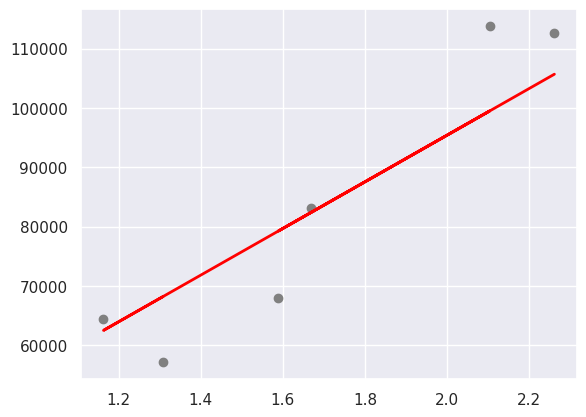

In [179]:
plt.scatter(X_test_1og, Y_test_log,  color='gray')
plt.plot(X_test_1og, l_model, color='red', linewidth=2)
plt.show()

Calculate Error Rate of the  Logrithm Transformation model.

In [180]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_log, l_model))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_log, l_model) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_log, l_model)))
print("R^2 Score :          ", metrics.r2_score(Y_test_log, l_model))
results2 = pd.DataFrame([['Logrithm Transformation Model', metrics.mean_absolute_error(Y_test_log, l_model), metrics.mean_squared_error(Y_test_log, l_model), np.sqrt(metrics.mean_squared_error(Y_test_log, l_model)), metrics.r2_score(Y_test_log, l_model)]],
               columns = ['Model', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R^2 Score'])

Mean Absolute Error: 7714.638101223964
Mean Squared Error: 84567607.74831854
Root Mean Squared Error: 9196.064796874723
R^2 Score :           0.8344395471211845


## **Exponential Transformation Model**

In [181]:
# Input dataset
X_e_log = df1['EXP'].values.reshape(-1,1)

# Output or Predicted Value of data
y_e_log = np.log(df1['SAL'].values.reshape(-1,1))

In [182]:
X_train_exp, X_test_exp, Y_train_exp, Y_test_exp = train_test_split(X_e_log, y_e_log, test_size=0.2, random_state= 42)

In [183]:
exp_model= LinearRegression()
exp_model.fit(X_train_exp, Y_train_exp)

LinearRegression()

In [184]:
print(" Exponent Model Intercept value is ", exp_model.intercept_)
print(" Exponent model Coefficient value is ", exp_model.coef_)

 Exponent Model Intercept value is  [10.48525073]
 Exponent model Coefficient value is  [[0.12704681]]


In [185]:
exp_model_pred= exp_model.predict(X_test_exp)
exp_model_pred

array([[11.70490014],
       [11.10778012],
       [11.5270346 ],
       [11.15859884],
       [10.89180053],
       [10.95532394]])

In [186]:
pmsh_exp = pd.DataFrame({'Actual':Y_test_exp.flatten(), 'Predict': exp_model_pred.flatten()})
pmsh_exp

,Actual,Predict
0,11.631908,11.704900
1,11.126351,11.107780
2,11.642303,11.527035
3,11.327656,11.158599
4,11.073567,10.891801
5,10.954117,10.955324


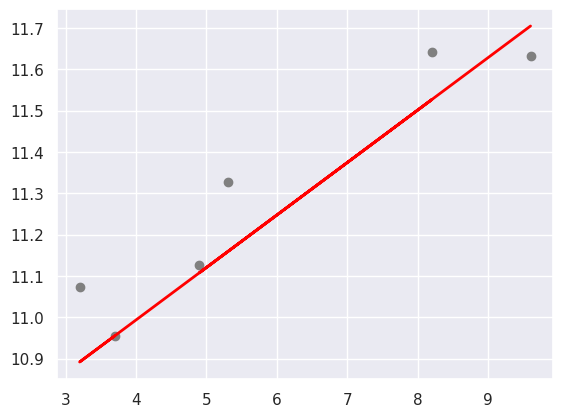

In [187]:
plt.scatter(X_test_exp, Y_test_exp,  color='gray')
plt.plot(X_test_exp, exp_model_pred, color='red', linewidth=2)
plt.show()

In [188]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_exp, exp_model_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_exp, exp_model_pred) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_exp, exp_model_pred)))
print("R^2 Score :          ", metrics.r2_score(Y_test_exp, exp_model_pred))
results3 = pd.DataFrame([['Exponential Transformation Model', metrics.mean_absolute_error(Y_test_exp, exp_model_pred), metrics.mean_squared_error(Y_test_exp, exp_model_pred), np.sqrt(metrics.mean_squared_error(Y_test_exp, exp_model_pred)), metrics.r2_score(Y_test_exp, exp_model_pred)]],
               columns = ['Model', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R^2 Score'])

Mean Absolute Error: 0.09314373254401727
Mean Squared Error: 0.013430075287585596
Root Mean Squared Error: 0.11588820167551828
R^2 Score :           0.8120949075482874


# **Quadratic Transformation Model**

In [189]:
df1['Square_EXP'] = df1.apply(lambda row: row.EXP**2, axis =1 )
df1

,EXP,SAL,Square_EXP
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [190]:
X_q = df1.iloc[:,df1.columns != 'SAL']
Y_q = df1.iloc[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X_q, Y_q, test_size=0.2, random_state= 42)
print(Y_test)


27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: SAL, dtype: float64


In [191]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [192]:
print(" Intercept value of Model is " ,model.intercept_)

coeff_df = pd.DataFrame(model.coef_,X_q.columns ,columns=['Coefficient'])
print(coeff_df)

 Intercept value of Model is  27285.66834967611
            Coefficient
EXP         8497.965462
Square_EXP    80.620847


In [193]:
y_pred_q_q = model.predict(X_test)

In [194]:
df_qm = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_q_q})
df_qm.head()

,Actual,Predicted
27,112635.0,116296.154089
15,67938.0,70861.405662
23,113812.0,102389.930923
17,83088.0,74589.524904
8,64445.0,55304.715307


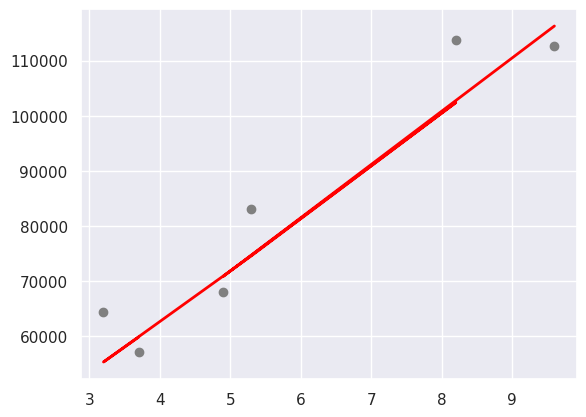

In [195]:
x_t =np.array(X_test)
plt.scatter(x_t[:,0], Y_test,  color='gray')
plt.plot(x_t[:,0], y_pred_q_q, color='red', linewidth=2)
plt.show()

In [196]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_q_q))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_q_q) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_q_q)))
print("R^2 Score :          ", metrics.r2_score(Y_test, y_pred_q_q))
results4 = pd.DataFrame([['Quadratic Transformation Model', metrics.mean_absolute_error(Y_test, y_pred_q_q),
                          metrics.mean_squared_error(Y_test, y_pred_q_q), np.sqrt(metrics.mean_squared_error(Y_test, y_pred_q_q)), metrics.r2_score(Y_test, y_pred_q_q)]],
               columns = ['Model', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R^2 Score'])

Mean Absolute Error: 6381.371429702191
Mean Squared Error: 52527916.36877488
Root Mean Squared Error: 7247.614529538315
R^2 Score :           0.8971645780890872


# **Polynomial Transformation Model**

In [197]:
df1['Cube_EXP'] = df1.apply(lambda row: row.EXP**3, axis =1 )
df1

,EXP,SAL,Square_EXP,Cube_EXP
0,1.1,39343.0,1.21,1.331
1,1.3,46205.0,1.69,2.197
2,1.5,37731.0,2.25,3.375
3,2.0,43525.0,4.00,8.000
4,2.2,39891.0,4.84,10.648
5,2.9,56642.0,8.41,24.389
6,3.0,60150.0,9.00,27.000
7,3.2,54445.0,10.24,32.768
8,3.2,64445.0,10.24,32.768
9,3.7,57189.0,13.69,50.653


In [198]:
X_c = df1.iloc[:,df1.columns != 'SAL']
Y_c = df1.iloc[:,1]
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_c, Y_c, test_size=0.2, random_state= 42)
print(Y_test)

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: SAL, dtype: float64


In [199]:
cube_model = LinearRegression()
cube_model.fit(X_train_c, Y_train_c)

LinearRegression()

In [200]:
print(" Intercept value of Cubic Model is " ,cube_model.intercept_)

coeff_df = pd.DataFrame(cube_model.coef_, X_c.columns, columns=['Coefficient'])
print(coeff_df)


 Intercept value of Cubic Model is  39184.072470426756
            Coefficient
EXP        -1123.219163
Square_EXP  2094.576996
Cube_EXP    -118.359093


In [201]:
y_pred_cube = cube_model.predict(X_test_c)

In [202]:
df_33 = pd.DataFrame({'Actual':Y_test_c, 'Predicted': y_pred_cube})
df_33.head()

,Actual,Predicted
27,112635.0,116720.834043
15,67938.0,70046.263323
23,113812.0,105553.616210
17,83088.0,74446.732048
8,64445.0,53159.848830


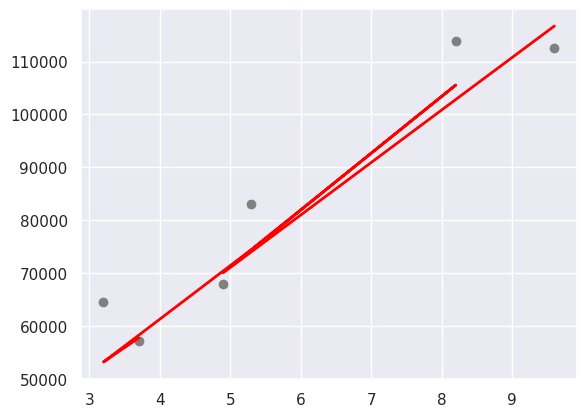

In [203]:
x_t_c =np.array(X_test_c)
plt.scatter(x_t_c[:,0], Y_test_c,  color='gray')
plt.plot(x_t_c[:,0], y_pred_cube, color='red', linewidth=2)
plt.show()

In [204]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_c, y_pred_cube))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_c, y_pred_cube) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_c, y_pred_cube)))
print("R^2 Score :          ", metrics.r2_score(Y_test_c, y_pred_cube))
results5 = pd.DataFrame([['Polynomial Transformation Model', metrics.mean_absolute_error(Y_test_c, y_pred_cube),
                          metrics.mean_squared_error(Y_test_c, y_pred_cube), np.sqrt(metrics.mean_squared_error(Y_test_c, y_pred_cube)), metrics.r2_score(Y_test_c, y_pred_cube)]],
               columns = ['Model', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R^2 Score'])

Mean Absolute Error: 5816.262964271612
Mean Squared Error: 48605815.33188682
Root Mean Squared Error: 6971.78709742967
R^2 Score :           0.9048429887854874


# **Cubic Linear Regression Pipeline¶**

In [205]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

INPT =[('scale',StandardScaler()), ('polynomial',PolynomialFeatures()), ('model', LinearRegression()) ]
pipe =Pipeline(INPT)
pipe.fit(df1[['EXP',  'Square_EXP', 'Cube_EXP']], df1['SAL'])
pred= pipe.predict(df1[['EXP',  'Square_EXP', 'Cube_EXP']])   

In [206]:
pmsh_exp_1 = pd.DataFrame({'Actual':df1['SAL'], 'Predict': pred})
pmsh_exp_1

,Actual,Predict
0,39343.0,39530.306101
1,46205.0,40720.976699
2,37731.0,42080.155573
3,43525.0,45799.250246
4,39891.0,47312.020937
5,56642.0,52475.178248
6,60150.0,53202.724865
7,54445.0,54666.251787
8,64445.0,54666.251787
9,57189.0,58481.181959


In [207]:
print('Mean Absolute Error:', metrics.mean_absolute_error(df1['SAL'], pred))  
print('Mean Squared Error:', metrics.mean_squared_error(df1['SAL'], pred) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df1['SAL'], pred)))
print("R^2 Score :          ", metrics.r2_score(df1['SAL'], pred))
results6 = pd.DataFrame([['Cubic Transformation Model', metrics.mean_absolute_error(df1['SAL'], pred),
                          metrics.mean_squared_error(df1['SAL'], pred), np.sqrt(metrics.mean_squared_error(df1['SAL'], pred)), metrics.r2_score(df1['SAL'], pred)]],
               columns = ['Model', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R^2 Score'])

Mean Absolute Error: 4033.895020469922
Mean Squared Error: 23706137.528491005
Root Mean Squared Error: 4868.894898073998
R^2 Score :           0.9673693577169904


In [211]:
results = results1.append(results2)
results = results.append(results3)
results = results.append(results4)
results = results.append(results5)
results = results.append(results6)
results

<ipython-input-211-a1a9b75c3df8>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results1.append(results2)
<ipython-input-211-a1a9b75c3df8>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results3)
<ipython-input-211-a1a9b75c3df8>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results4)
<ipython-input-211-a1a9b75c3df8>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results5)
<ipython-input-211-a1a9b75c3df8>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resu

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score
0,Simple linear Regression Model,3249.304483,1.903615e+07,4363.043260,0.974811
0,Logrithm Transformation Model,7714.638101,8.456761e+07,9196.064797,0.834440
0,Exponential Transformation Model,0.093144,1.343008e-02,0.115888,0.812095
0,Quadratic Transformation Model,6381.371430,5.252792e+07,7247.614530,0.897165
0,Polynomial Transformation Model,5816.262964,4.860582e+07,6971.787097,0.904843
0,Cubic Transformation Model,4033.895020,2.370614e+07,4868.894898,0.967369
